# Forbes Billionaires Analysis

**Meta-Data** of the Forbes Billionaries Dataset:
 - Rank - Rank of the Billionaire in the World.
 - Name - Name of the Billionaire.
 - Networth - Networth of the Billionaire.
 - Age - Age of the Billionaire.
 - Country - Country of the Billionaire.
 - Source - Source of income of the Billionaire.
 - Industry - Industry of Billionaire source of income.
 
 
 

Importing Required Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file using read_csv()

In [2]:
Forbes_df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\Projects\Exploratory-Data-Analysis-main\Exploratory-Data-Analysis-main\2022_forbes_billionaires.csv", index_col = 0)

In [3]:
Forbes_df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [4]:
Forbes_df.tail()

,rank,name,networth,age,country,source,industry
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [5]:
Forbes_df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [6]:
Forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 162.5+ KB


In [7]:
Forbes_df.iloc[10]

rank                                 11
name             Gautam Adani & family 
networth                          $90 B
age                                  59
country                           India
source      infrastructure, commodities
industry                   Diversified 
Name: 10, dtype: object

Removing $,B symbols and changing it to float DataType

In [8]:
Forbes_df['networth']=Forbes_df['networth'].apply(lambda x:x.replace('$','')).apply(lambda x:x.replace('B','')).apply(lambda x:x.replace(' ','')).astype(np.float64)

Changing the Names of the Columns

In [9]:
Forbes_df = Forbes_df.rename(columns={'name':'Name','rank':'Rank','networth':'Networth($ Billion)','age':'Age','country':'Country','source':'Source','industry':'Industry'})

In [16]:
Forbes_df.head()

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


## Q1. Top 10 Richest People in the World

C:\Users\rahul\AppData\Local\Temp\ipykernel_16568\985845090.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Forbes_df['Name'][:10],rotation = 90)


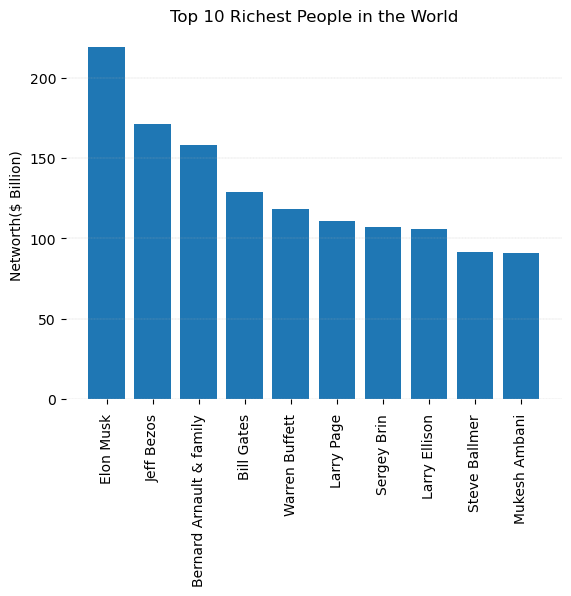

In [17]:
fig,ax=plt.subplots()
ax.bar(Forbes_df['Name'][:10],Forbes_df['Networth($ Billion)'][:10])
[s.set_visible(False) for s in ax.spines.values()] #for removing borders
ax.set_title("Top 10 Richest People in the World")
ax.set_ylabel("Networth($ Billion)")
ax.set_xticklabels(Forbes_df['Name'][:10],rotation = 90)
plt.grid(axis = 'y',linestyle = '--',linewidth=0.2)
plt.show()

## Q2. The country with Highest billionaires? 

In [18]:
Forbes_df['Country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [19]:
Forbes_df.groupby('Country').size()

Country
Algeria            1
Argentina          6
Australia         44
Austria           11
Barbados           1
                ... 
United States    719
Uruguay            2
Venezuela          1
Vietnam            7
Zimbabwe           1
Length: 75, dtype: int64

In [20]:
len(Forbes_df.groupby('Country').size())

75

In [21]:
country_counts = Forbes_df.groupby('Country').size()

In [22]:
country_counts = country_counts.to_frame()

In [23]:
country_counts = country_counts.rename(columns={0:'Count'})

In [24]:
country_counts = country_counts.sort_values(by='Count',ascending = False)

In [25]:
country_counts

,Count
Country,
United States,719
China,515
India,161
Germany,130
Russia,81
...,...
Eswatini (Swaziland),1
Estonia,1
Belize,1


C:\Users\rahul\AppData\Local\Temp\ipykernel_16568\4185774060.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = country_counts.index,rotation = 90)


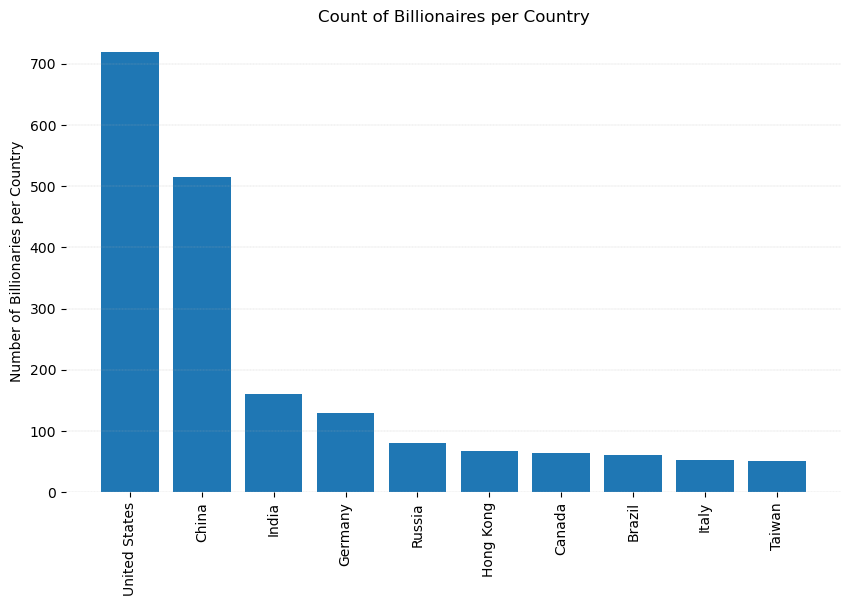

In [26]:
fig,ax2 = plt.subplots(figsize=(10,6))
ax2.bar(country_counts.index[:10],country_counts['Count'][:10])
[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title("Count of Billionaires per Country")
ax2.set_ylabel("Number of Billionaries per Country")
ax2.set_xticklabels(labels = country_counts.index,rotation = 90)
plt.grid(axis = 'y',linestyle = '--',linewidth = 0.2)
plt.show()

## Q3 How many of these are from Africa?
There is no continent column in this Data Set. So, I should make a lsit of African Countries and Search in that Countries

In [27]:
Africa=[ 'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verd','Central African Republic',
        'Chad','Comoros','Congo-Brazzaville','Congo-Kinshasa',"Côte d'Ivoire",'Djibouti','Egypt','Equatorial Guinea','Eritrea',
        'Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malaw',
        'Mali','Mauritania','Mauritius','Mayotte','Morocco','Mozambique','Namibia','Niger', 'Nigeria','Reunion','Rwanda',
        'Saint Helena','Sao Tome and Príncipe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','Sudan',
        'Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara(SADR)','Zambia','Zimbabwe']

In [28]:
country_list=[]
for Country in Africa:
    if Country in country_counts.index:
        country_list.append(Country)

In [29]:
country_list

['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']

Apparently, there are seven countries in the list. The highest count in this list would be:

In [30]:
country_counts.loc[country_list]

,Count
Country,
Algeria,1
Egypt,6
Morocco,2
Nigeria,3
South Africa,5
Tanzania,1
Zimbabwe,1


In [31]:
Forbes_df['Country'][Forbes_df['Country']=='South Africa'].index.tolist()

[233, 244, 934, 1342, 1686]

Billionaires in South Africa

In [32]:
South_africa_billionaires = Forbes_df.iloc[[233, 244, 934, 1342, 1686]]

In [33]:
South_africa_billionaires

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
233,230,Johann Rupert & family,8.9,71,South Africa,luxury goods,Fashion & Retail
244,241,Nicky Oppenheimer & family,8.7,76,South Africa,diamonds,Metals & Mining
934,913,Patrice Motsepe,3.3,60,South Africa,mining,Metals & Mining
1342,1341,Koos Bekker,2.3,69,South Africa,"media, investments",Media & Entertainment
1686,1645,Michiel Le Roux,1.8,72,South Africa,banking,Finance & Investments


C:\Users\rahul\AppData\Local\Temp\ipykernel_16568\2011930409.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=South_africa_billionaires['Name'],rotation = 90)


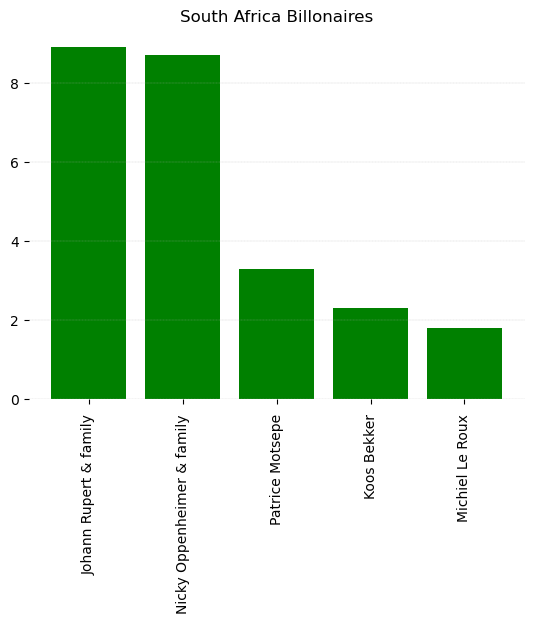

In [36]:
fig,ax3=plt.subplots()
ax3.bar(South_africa_billionaires['Name'],South_africa_billionaires['Networth($ Billion)'],color='green')
[s.set_visible(False) for s in ax3.spines.values()]
ax3.set_title('South Africa Billonaires')
ax.set_ylabel('Networth $(Billions)')
ax3.set_xticklabels(labels=South_africa_billionaires['Name'],rotation = 90)
plt.grid(axis='y',linestyle='--',linewidth=0.2)
plt.show()

## Q4 Which Industry generates the most billionaires in the world?

In [37]:
Forbes_df['Industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [38]:
Forbes_df['Industry'] = Forbes_df['Industry'].apply(lambda x:x.replace(' ',''))

In [39]:
Industry_count=Forbes_df.groupby('Industry').size()

In [40]:
Industry_count = Industry_count.to_frame()
Industry_count = Industry_count.rename(columns={0:'count'})
Industry_count = Industry_count.sort_values(by='count',ascending = False)

In [41]:
Industry_count

,count
Industry,
Finance&Investments,386
Technology,329
Manufacturing,322
Fashion&Retail,246
Healthcare,212
Food&Beverage,201
RealEstate,189
Diversified,178
Media&Entertainment,95


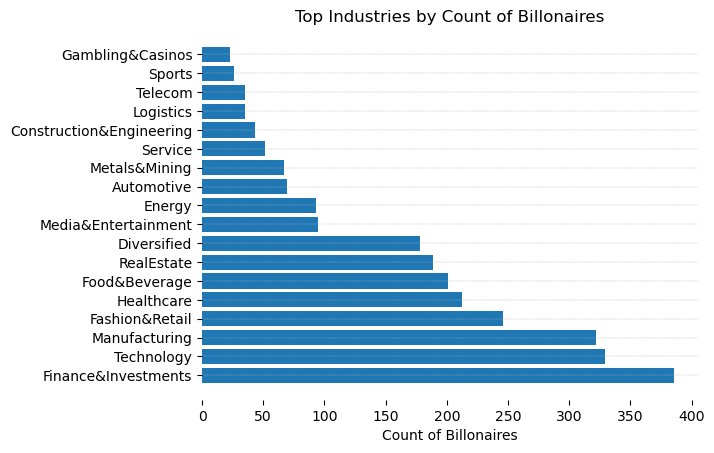

In [43]:
fig,ax4=plt.subplots()
[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(Industry_count.index,Industry_count['count'])
ax4.set_title('Top Industries by Count of Billonaires')
ax4.set_xlabel('Count of Billonaires')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

## Q5 Relation between Money and Age

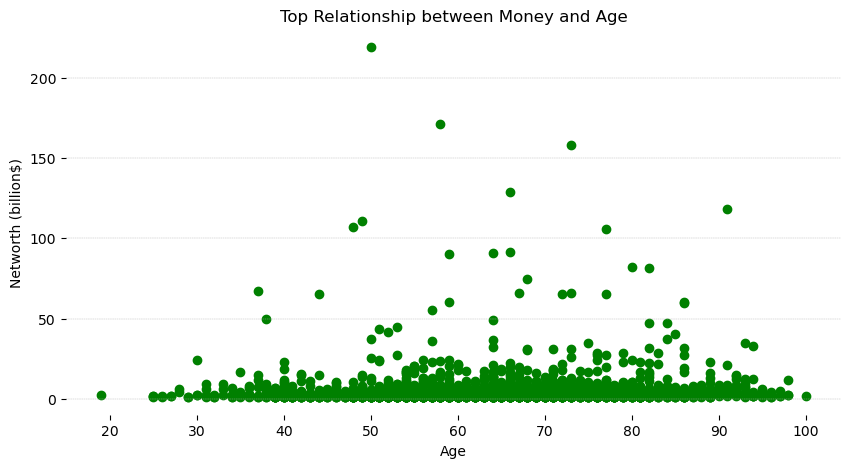

In [45]:
fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(Forbes_df['Age'],Forbes_df['Networth($ Billion)'],color='green')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Top Relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth (billion$)')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

This showsthat there is no relation between Money and Age

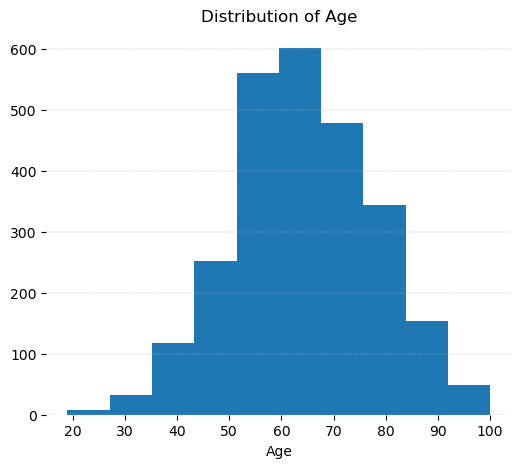

In [46]:
fig, ax6 = plt.subplots(figsize=(6,5))
ax6.hist(Forbes_df['Age'])
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Distribution of Age')
ax6.set_xlabel('Age')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

## Q6 Youngest Billionaires in the World

In [47]:
By_Age=Forbes_df.sort_values(by='Age',ascending=True)

In [48]:
By_Age

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion&Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals&Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance&Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance&Investments
...,...,...,...,...,...,...,...
1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance&Investments
1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food&Beverage
162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


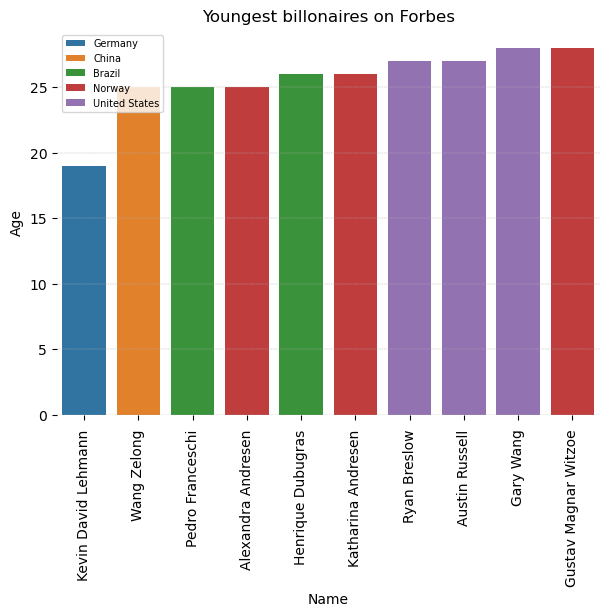

In [49]:
fig, ax6 = plt.subplots(figsize=(7,5))
sns.barplot(By_Age['Name'][:10],By_Age['Age'][:10],hue=By_Age['Country'][:10],dodge=False)
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Youngest billonaires on Forbes')
ax6.set_ylabel('Age')
ax6.set_xticklabels(labels=By_Age['Name'][:10],rotation=90)
ax6.legend(fontsize=7,loc='upper left')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()